In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
df=pd.read_csv(r"C:\Users\nilesh\OneDrive\Desktop\mayur p\seoul bike sharing\data\SeoulBikeData.csv",encoding='unicode_escape')

In [3]:
df.shape

(8760, 14)

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [7]:
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')

df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [8]:
df['Day'].isnull().sum()

0

In [9]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018


In [10]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [11]:
df['Weekday']=df['Date'].dt.day_name()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [13]:
df.drop('Date',axis=1,inplace=True)

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

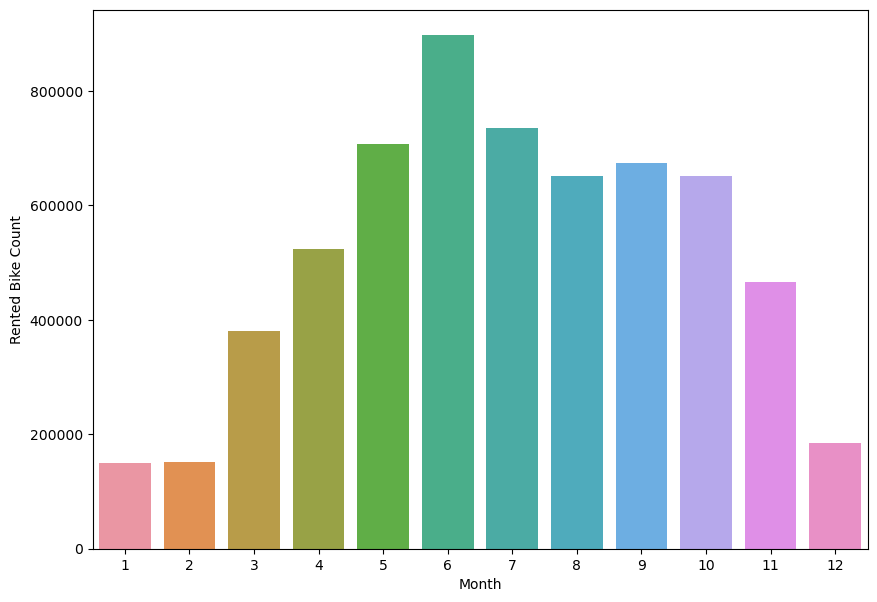

In [14]:
plt.figure(figsize=(10,7))
Month=df.groupby('Month').sum().reset_index()

sns.barplot(x='Month',y='Rented Bike Count',data=Month)

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

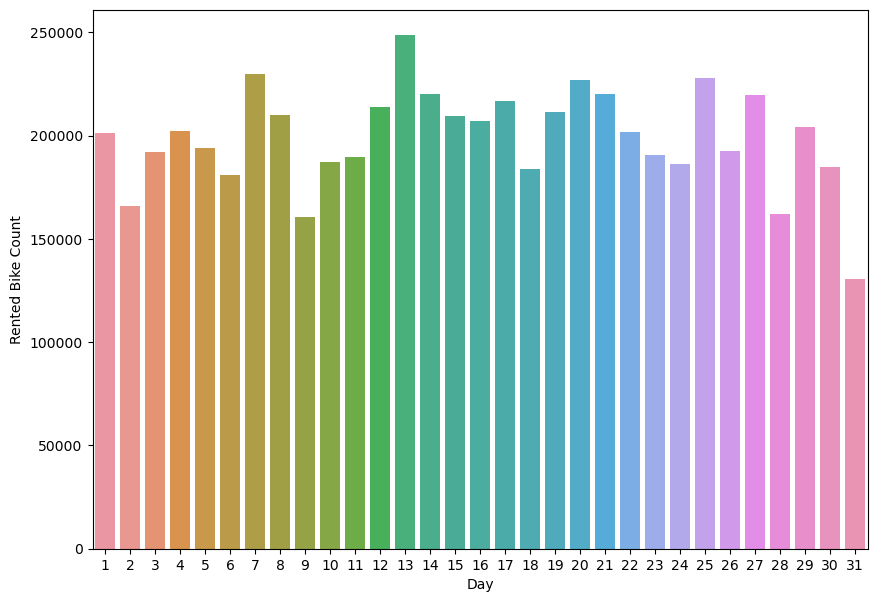

In [15]:
plt.figure(figsize=(10,7))
Month=df.groupby('Day').sum().reset_index()

sns.barplot(x='Day',y='Rented Bike Count',data=Month)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

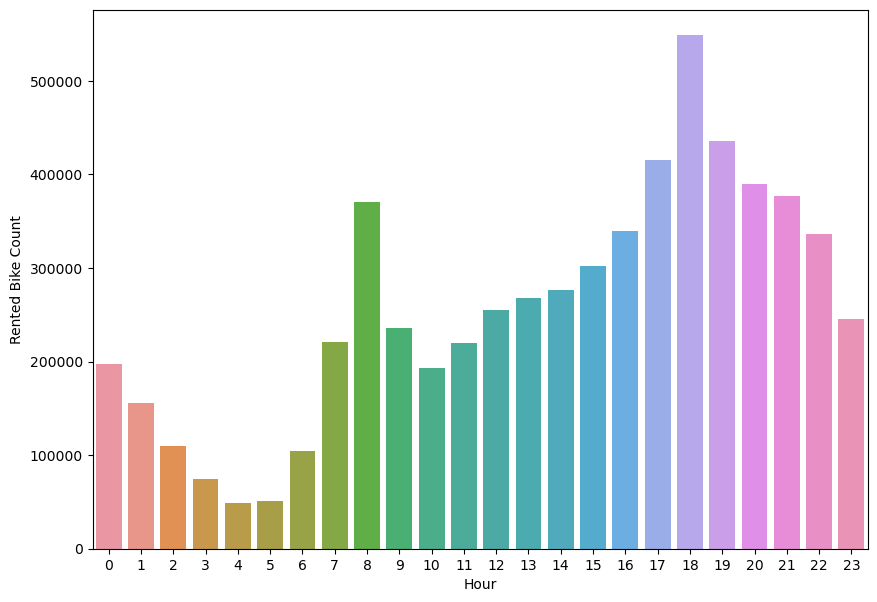

In [16]:
plt.figure(figsize=(10,7))
Month=df.groupby('Hour').sum().reset_index()

sns.barplot(x='Hour',y='Rented Bike Count',data=Month)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

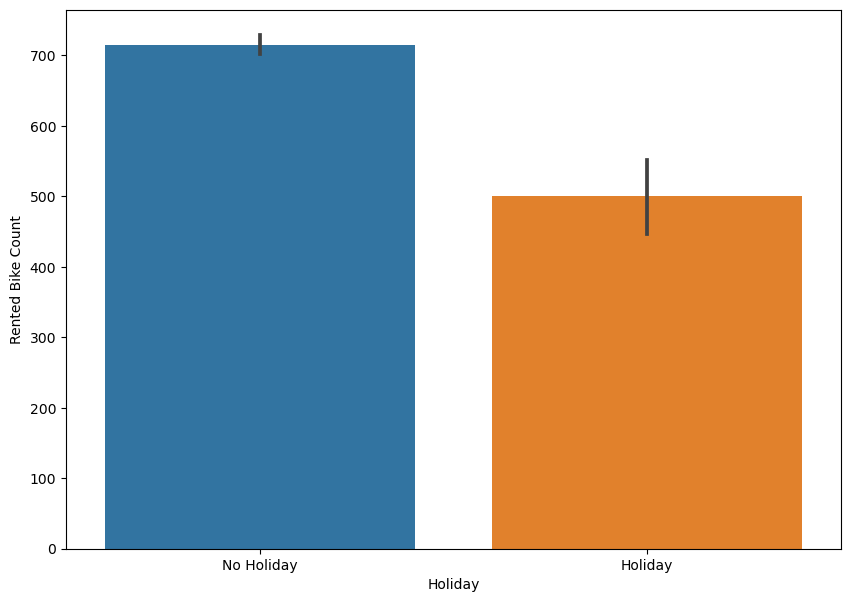

In [17]:
plt.figure(figsize=(10,7))

sns.barplot(x='Holiday',y='Rented Bike Count',data=df)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

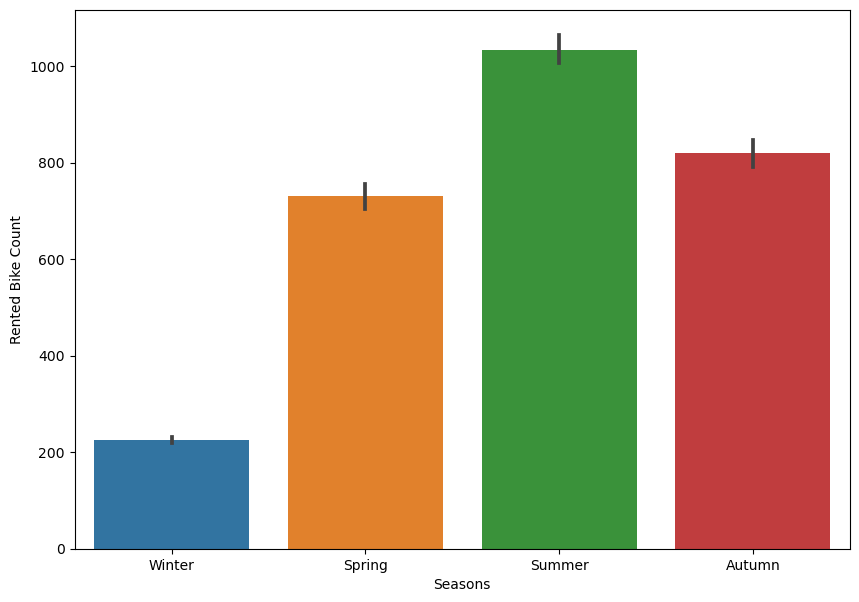

In [18]:
plt.figure(figsize=(10,7))

sns.barplot(x='Seasons',y='Rented Bike Count',data=df)

## Skewed Data

In [19]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday


## Remove Multicollinearity

In [20]:
df1=df.drop(['Seasons','Holiday','Functioning Day','Weekday'],axis=1)

<Axes: >

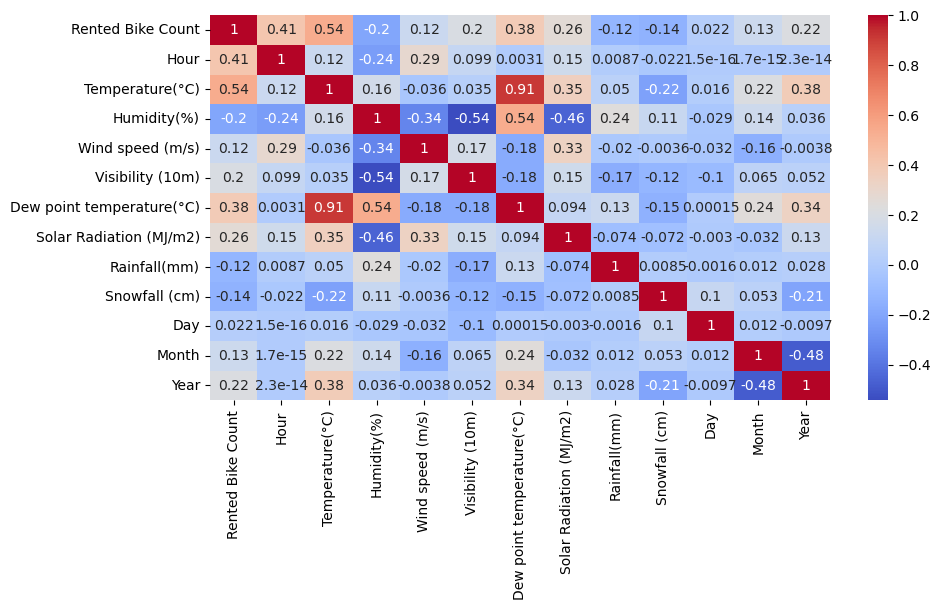

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

In [22]:
#drop=Dew point temperature

In [23]:
def get_vif(df1):
    vif=pd.DataFrame()
    vif['Variables']=df1.columns
    vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    return vif

In [24]:
not_for_vif=['Day','Month','Year','Rented Bike Count']
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,Variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [25]:
not_for_vif=['Day','Month','Year','Rented Bike Count','Dew point temperature(°C)']
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,Variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [26]:
df.drop('Dew point temperature(°C)',axis=1,inplace=True)

In [27]:
df1.drop('Dew point temperature(°C)',axis=1,inplace=True)

In [28]:
df1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,12,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,12,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,12,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,12,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,30,11,2018
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,30,11,2018
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,30,11,2018
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,30,11,2018


## Encoding

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Day                      8760 non-null   int32  
 13  Month                    8760 non-null   int32  
 14  Year                    

In [30]:
cat_feature=['Seasons','Holiday','Functioning Day','Weekday']

In [31]:
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [32]:
df['Holiday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})
df['Functioning Day']=df['Functioning Day'].map({'Yes':1,'No':0})


In [33]:
df_season=pd.get_dummies(df['Seasons'],drop_first=True)
df_weekdays=pd.get_dummies(df['Weekday'],drop_first=True)
df=pd.concat([df,df_season,df_weekdays],axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Day                      8760 non-null   int32  
 13  Month                    8760 non-null   int32  
 14  Year                    

In [35]:
df['Spring']=df['Spring'].astype('int')
df['Summer']=df['Summer'].astype('int')
df['Winter']=df['Winter'].astype('int')

In [36]:
lis=['Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']
for column in lis:
    df[column]=df[column].astype('int')

In [37]:
df.drop(['Seasons','Weekday'],axis=1,inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int32  
 12  Month                    8760 non-null   int32  
 13  Year                     8760 non-null   int32  
 14  Spring                  

In [39]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Year,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,0,0,0


In [40]:
df.shape

(8760, 23)

## Spliting data

In [41]:
X=df.drop('Rented Bike Count',axis=1)
y=df['Rented Bike Count']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2023)

In [42]:
sc=StandardScaler()
sc.fit(x_train)

x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

## Training ML model

#### Linear Regression model

In [43]:
from sklearn.linear_model import LinearRegression


In [44]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred=lr.predict(x_test)

In [46]:
y_pred

array([  -3.42150244, 1022.33291293, 1474.26387368, ..., 1524.82148315,
        547.90926416,  739.64325466])

### Model Evaluation

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [48]:
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
MAR=mean_absolute_error(y_test,y_pred)
R2=r2_score(y_test,y_pred)

print(f'MSE:{MSE}')
print(f'RMSE:{RMSE}')
print(f'MAR:{MAR}')
print(f'R2:{R2}')

MSE:186569.9819319257
RMSE:431.9374745630734
MAR:330.21078355249125
R2:0.5429221393038917


In [49]:
def get_metrics(y_true,y_pred,model_name):
    MSE=mean_squared_error(y_test,y_pred)
    RMSE=np.sqrt(MSE)
    MAR=mean_absolute_error(y_test,y_pred)
    R2=r2_score(y_test,y_pred)
    
    print(f"{model_name}:['MSE':{round(MSE,3)},'RMSE':{round(RMSE,3)},'MAR':{round(MAR,3)},'R2':{round(R2,3)}]")

In [50]:
get_metrics(y_test,y_pred,'LinearRegression')

LinearRegression:['MSE':186569.982,'RMSE':431.937,'MAR':330.211,'R2':0.543]


### Train Multiple Models

In [51]:
!pip install xgboost

In [52]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [53]:
rir=Ridge().fit(x_train,y_train)
y_pred_rir=rir.predict(x_test)

lar=Lasso().fit(x_train,y_train)
y_pred_lar=lar.predict(x_test)

poly=PolynomialFeatures(2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

poly_r=LinearRegression().fit(x_train_poly,y_train)
y_pred_poly=poly_r.predict(x_test_poly)

svr=SVR().fit(x_train,y_train)
y_pred_svr=svr.predict(x_test)

knnr=KNeighborsRegressor().fit(x_train,y_train)
y_pred_knnr=knnr.predict(x_test)

dtr=DecisionTreeRegressor().fit(x_train,y_train)
y_pred_dtr=dtr.predict(x_test)

rfr=RandomForestRegressor().fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)

xgbr=XGBRegressor().fit(x_train,y_train)
y_pred_xgbr=xgbr.predict(x_test)

In [54]:
get_metrics(y_test,y_pred_rir,'Ridge')
get_metrics(y_test,y_pred_lar,'Lasso')
get_metrics(y_test,y_pred_poly,'PolynomialFeatures')
get_metrics(y_test,y_pred_svr,'SVR')
get_metrics(y_test,y_pred_knnr,'KNNR')
get_metrics(y_test,y_pred_dtr,'DecisionTreeRegressor')
get_metrics(y_test,y_pred_rfr,'RandomForestRegressor')
get_metrics(y_test,y_pred_xgbr,'XGBRegressor')

Ridge:['MSE':186567.569,'RMSE':431.935,'MAR':330.2,'R2':0.543]
Lasso:['MSE':187028.139,'RMSE':432.468,'MAR':330.257,'R2':0.542]
PolynomialFeatures:['MSE':117087.63,'RMSE':342.181,'MAR':239.635,'R2':0.713]
SVR:['MSE':313071.334,'RMSE':559.528,'MAR':381.349,'R2':0.233]
KNNR:['MSE':100530.621,'RMSE':317.066,'MAR':207.508,'R2':0.754]
DecisionTreeRegressor:['MSE':60390.401,'RMSE':245.745,'MAR':133.893,'R2':0.852]
RandomForestRegressor:['MSE':29861.906,'RMSE':172.806,'MAR':98.33,'R2':0.927]
XGBRegressor:['MSE':24164.912,'RMSE':155.451,'MAR':95.454,'R2':0.941]


### Visualise Model Prediction

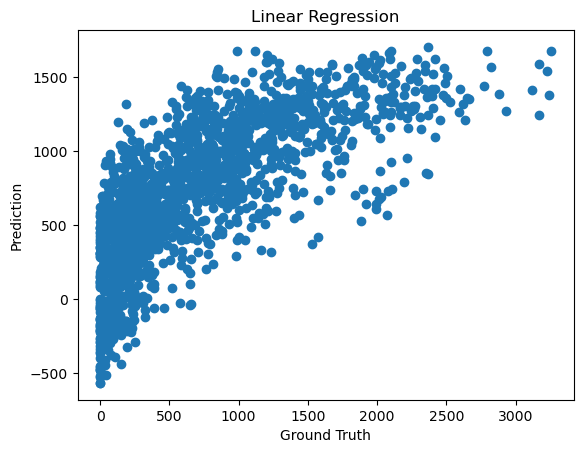

In [55]:
plt.scatter(y_test,y_pred)
plt.title('Linear Regression')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

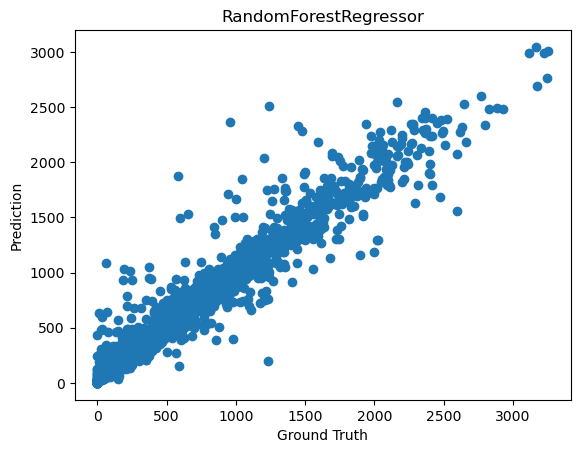

In [56]:
plt.scatter(y_test,y_pred_rfr)
plt.title('RandomForestRegressor')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

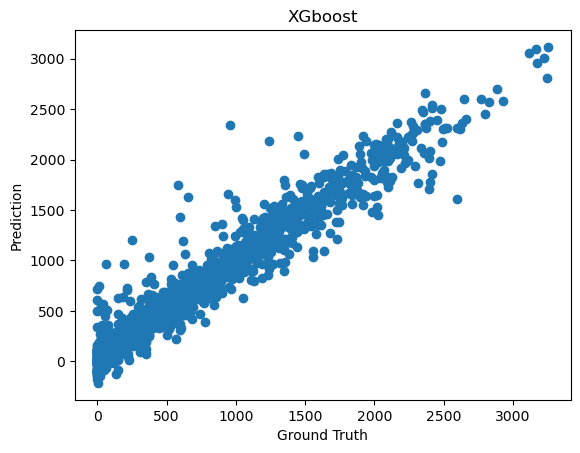

In [57]:
plt.scatter(y_test,y_pred_xgbr)
plt.title('XGboost')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

## Hyperparameter Tuning for random forest regressor

In [58]:
from sklearn.model_selection import RandomizedSearchCV

#number of trees
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]

#number of features
max_features=['auto','sqrt']

#maximum number of levels
max_depth=[int(x) for x in np.linspace(10,120,num=12)]

#minimum number of samples required to split a node
min_samples_split=[2,5,10]

#minimum number of samples required at each leaf node
min_samples_leaf=[1,2,4]

#methods of selection
bootstrap=[True,False]

random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}

rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
rf_random.fit(x_train,y_train)
y_pred_rf_random=rf_random.predict(x_test)

## Save ML Best Model

In [60]:
import pickle 
import os

dir=r"C:\Users\nilesh\OneDrive\Desktop\mayur p\seoul bike sharing\models"
model_file_name='xgboost_regressor_r2_0.941.pkl'

model_file_path=os.path.join(dir,model_file_name)
model_file_path

pickle.dump(xgbr,open(model_file_path,'wb'))

In [71]:
x_test[2,:]

array([ 0.50060987,  0.98718632, -0.69180254,  2.40011233,  0.92262892,
        1.56419996, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
       -0.98911087,  0.72160984,  0.30459857, -0.57427456, -0.58152447,
       -0.57866842, -0.40630934, -0.40916536, -0.4075004 , -0.40511677,
       -0.40081071, -0.41367015])

In [72]:
y_test.iloc[2]

1391

## Dump scalling parameter

In [75]:
sc_dump_path=r"C:\Users\nilesh\OneDrive\Desktop\mayur p\seoul bike sharing\models\sc.pkl"

pickle.dump(sc,open(sc_dump_path,'wb'))

In [76]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day',
       'Month', 'Year', 'Spring', 'Summer', 'Winter', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')